In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress

In [4]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [5]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [6]:
import matplotlib.colors as colors
path='./'
B_unit=np.sqrt(4*np.pi)
iter=132500

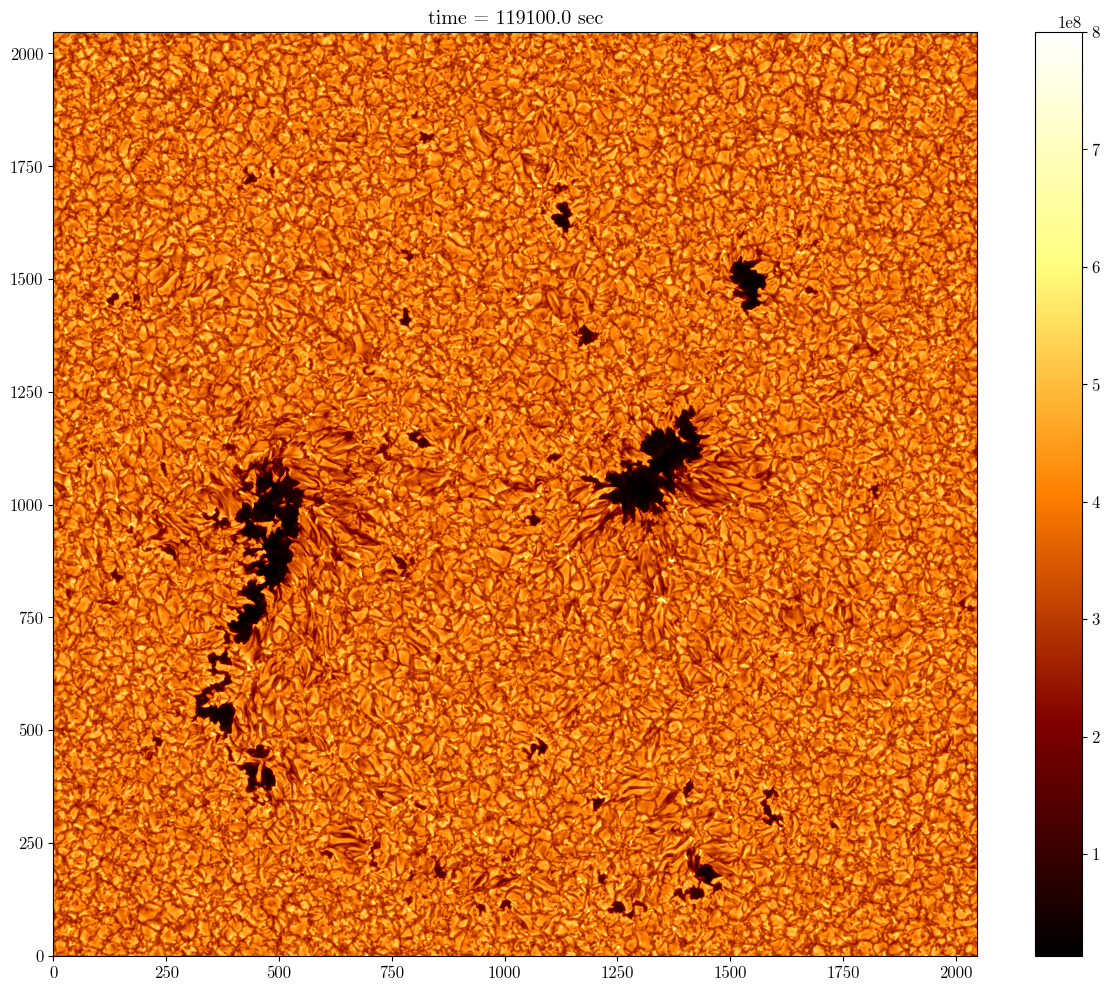

In [7]:
Int = mio.MuramIntensity(path, iter)
plt.figure(figsize=(15,12))
plt.imshow(Int.T,cmap='afmhot',origin='lower',vmax=8e8)
plt.title(f"time = {Int.time} sec")
plt.colorbar()
plt.show()

In [8]:
cube = np.fromfile("tau_slice_1.000.132000")

In [9]:
np.shape(cube)

(23068674,)

In [10]:
cube = mio.MuramTauSlice(path, 132000, 1.0)

In [11]:
np.shape(cube)

(11, 2048, 2048)

In [12]:
B_unit=np.sqrt(4*np.pi)

IndexError: index 11 is out of bounds for axis 0 with size 11

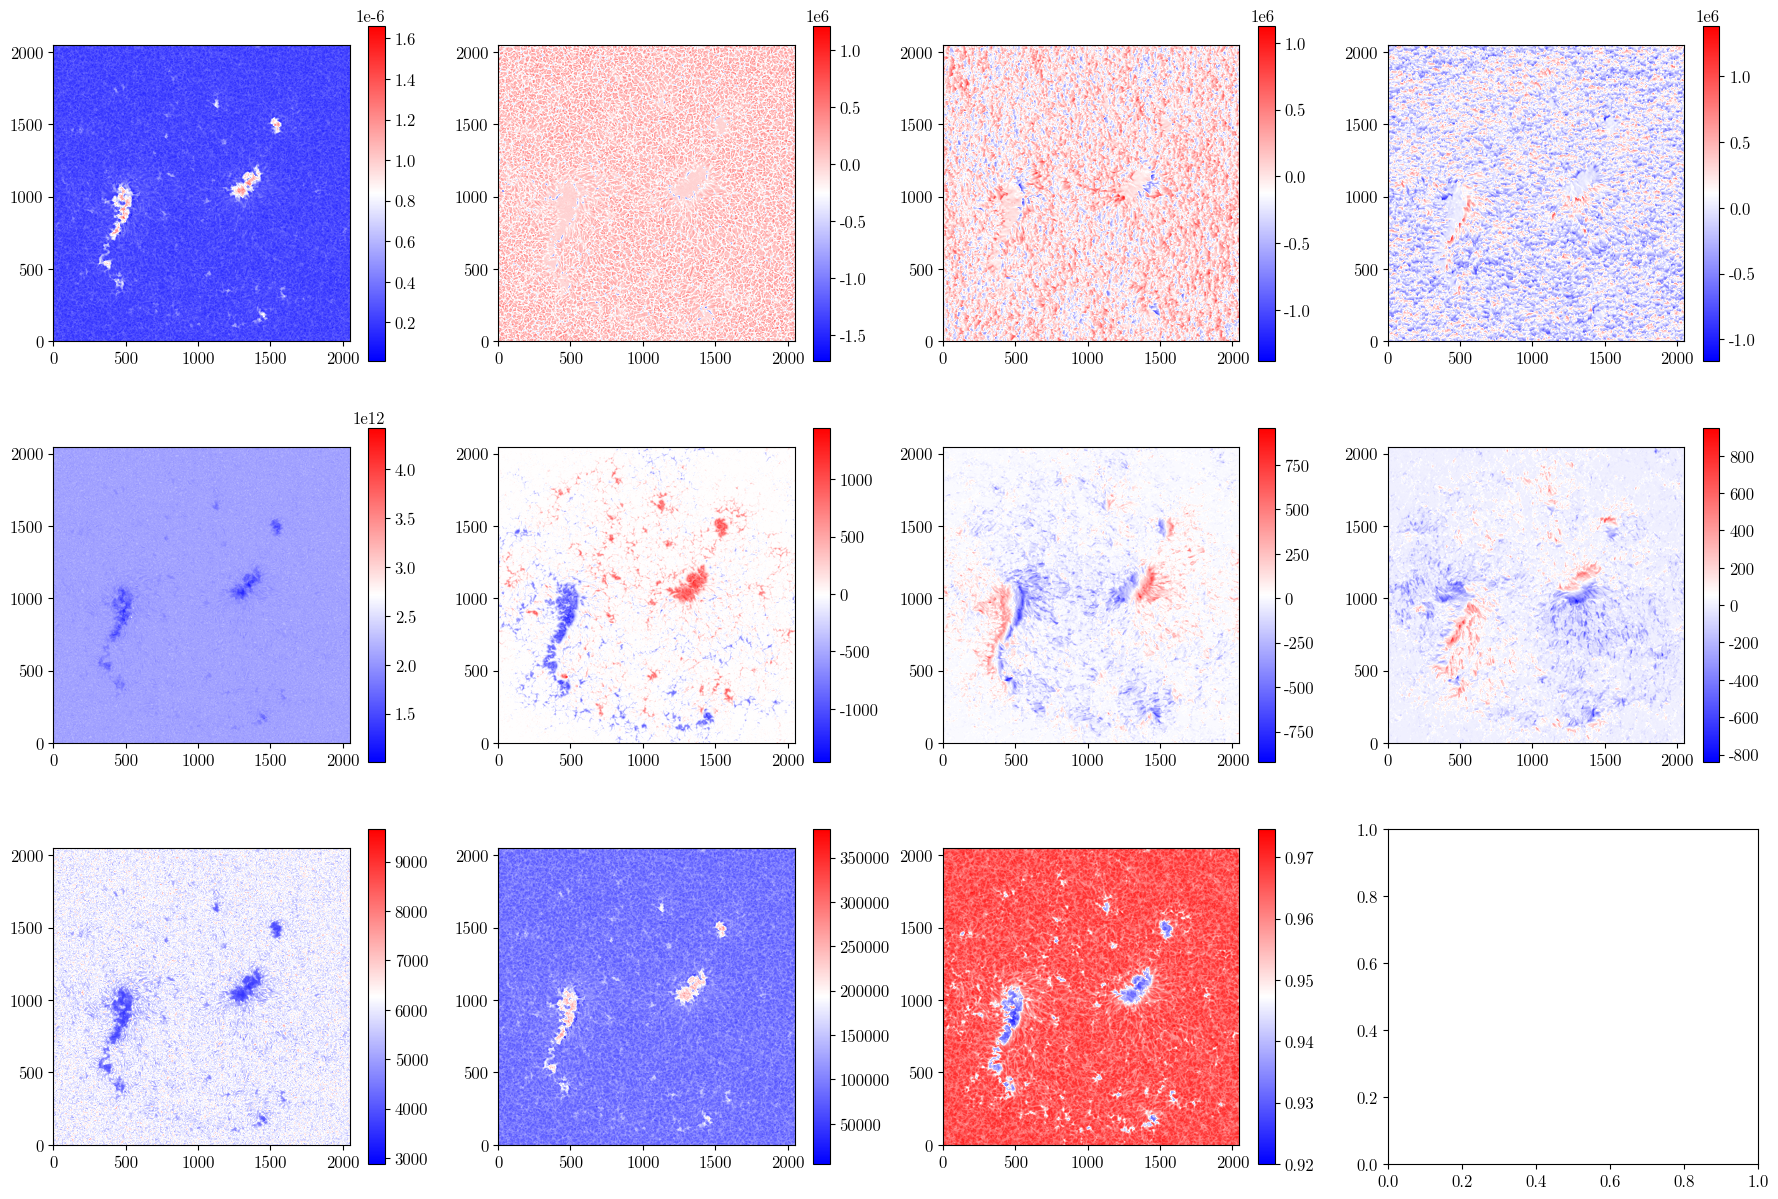

In [15]:
#AR
t=0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((cube[t,:,:].T), origin='lower', cmap='bwr')
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz.T, [10], colors = 'orange')
        t += 1



In [114]:
Bz = cube.Bx # ovde se ne mnozi

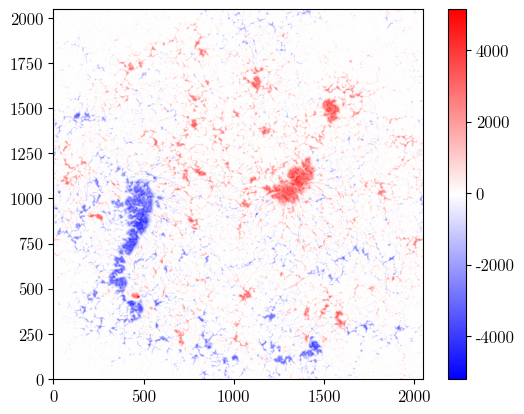

In [115]:
plt.imshow(Bz.T, origin = "lower", cmap = "bwr")
plt.colorbar()

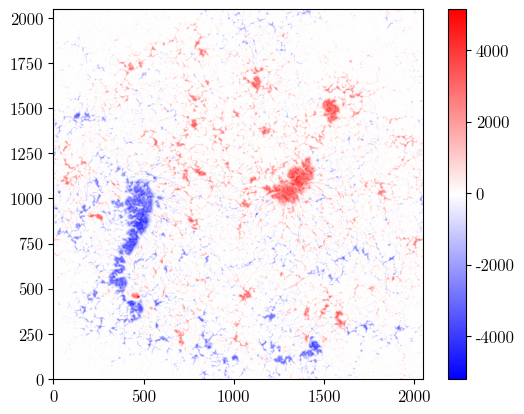

In [120]:
Bz_np = np.copy(cube[5,:,:] * np.sqrt(4 * np.pi))
plt.imshow(Bz_np.T, origin = "lower", cmap = "bwr")
plt.colorbar()

In [20]:
cube_qs = np.fromfile("tau_slice_1.000.005350", dtype = "float32")
first_ = cube_qs[4:].reshape(11, 1536, 1536)
Bz_1 = first_[7,:,:]
Bz_1 = Bz_1 * np.sqrt(4*np.pi)

data1 = mio.read_slice(path, 5350, 'tau', '1.000' )
test1 = np.copy(data1[0][5,:,:] * np.sqrt(4 * np.pi))

Text(0.5, 1.0, 'read_slice reading')

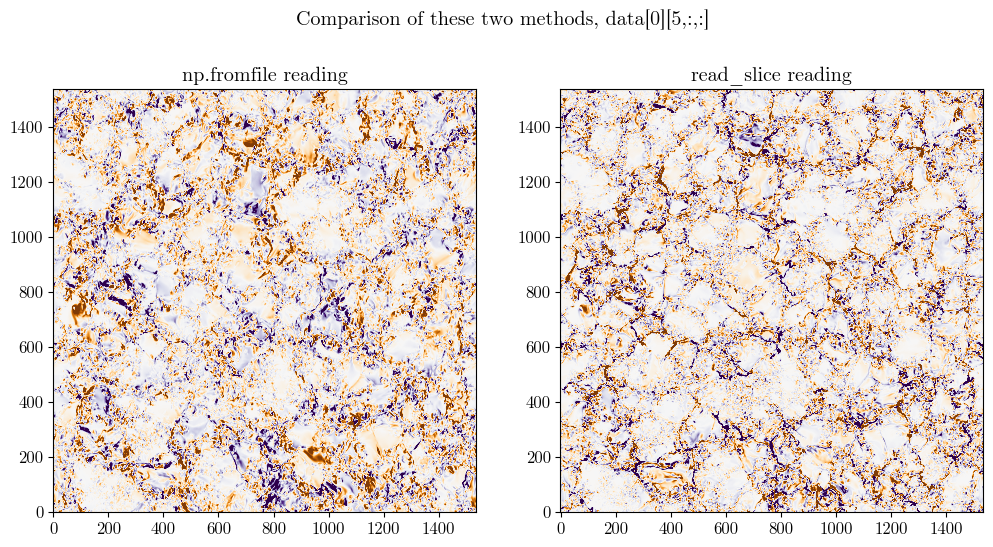

In [21]:
# Comparison of these two methods
fig = plt.figure(figsize = (12,6))
fig.suptitle("Comparison of these two methods, data[0][5,:,:]")
ax1 = fig.add_subplot(121)
ax1.imshow(Bz_1[:,:], origin='lower',cmap='PuOr', vmin = -200, vmax = 200)
ax1.set_title("np.fromfile reading") 

ax2 = fig.add_subplot(122)
ax2.imshow(test1[:,:].T, origin='lower', cmap='PuOr', vmin = -200, vmax = 200)
ax2.set_title("read_slice reading") 


Text(0.5, 1.0, 'read_slice reading')

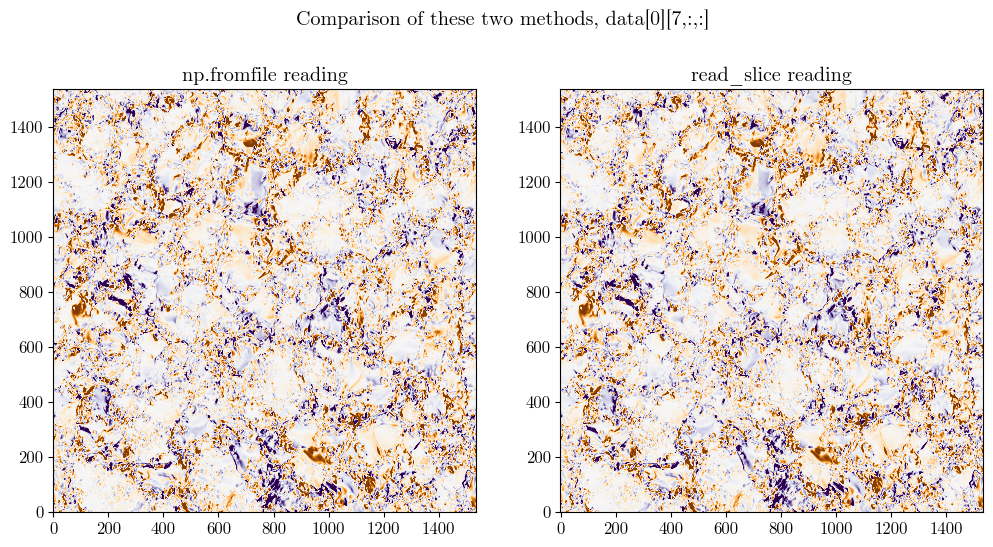

In [22]:
cube_qs = np.fromfile("tau_slice_1.000.005350", dtype = "float32")
first_ = cube_qs[4:].reshape(11, 1536, 1536)
Bz_1 = first_[7,:,:]
Bz_1 = Bz_1 * np.sqrt(4*np.pi)

data1 = mio.read_slice(path, 5350, 'tau', '1.000' )
test1 = np.copy(data1[0][7,:,:] * np.sqrt(4 * np.pi))

# Comparison of these two methods
fig = plt.figure(figsize = (12,6))
fig.suptitle("Comparison of these two methods, data[0][7,:,:]")
ax1 = fig.add_subplot(121)
ax1.imshow(Bz_1[:,:], origin='lower',cmap='PuOr', vmin = -200, vmax = 200)
ax1.set_title("np.fromfile reading") 

ax2 = fig.add_subplot(122)
ax2.imshow(test1[:,:].T, origin='lower', cmap='PuOr', vmin = -200, vmax = 200)
ax2.set_title("read_slice reading") 


IndexError: index 11 is out of bounds for axis 0 with size 11

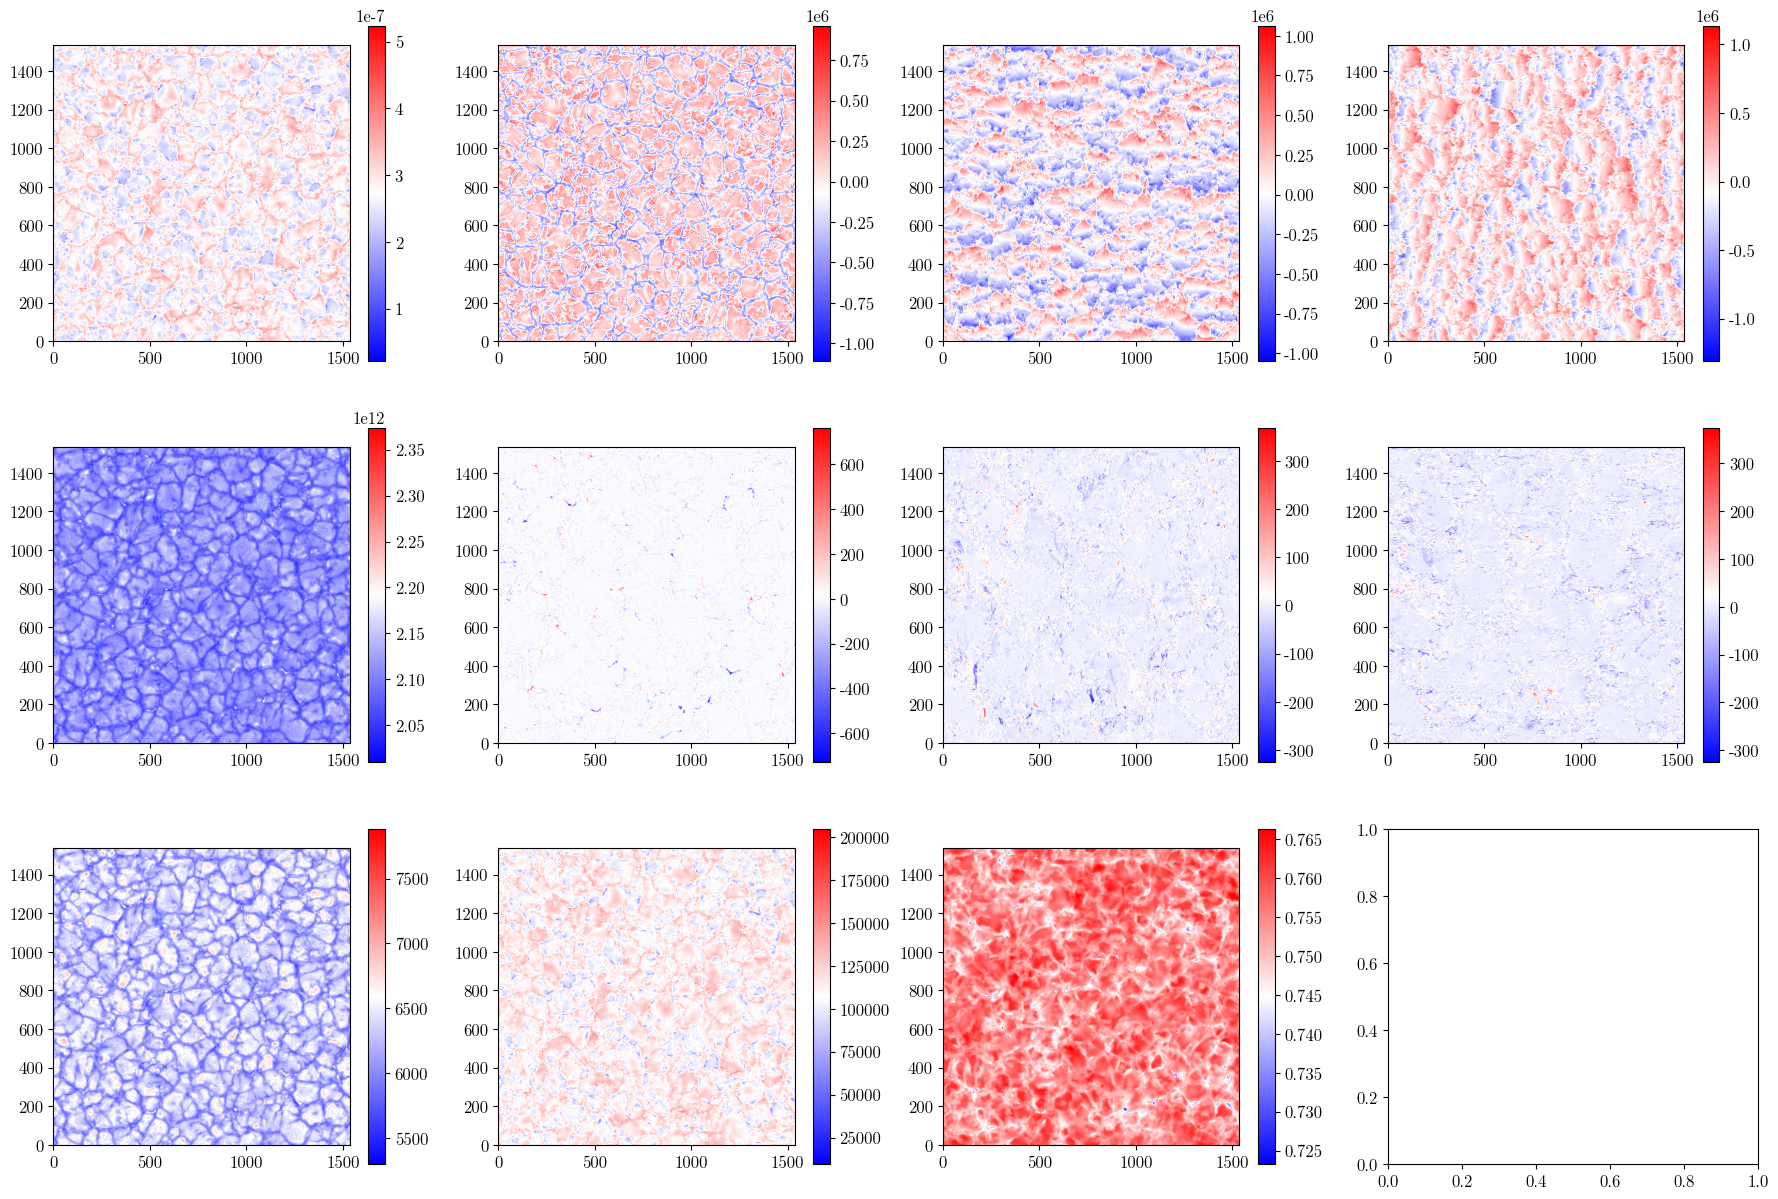

In [23]:
#QS

t=0
plt.figure(figsize=[22,20])
for i in range(0,4):
    for j in range(0,4):
        
        plt.subplot(4,4,i*4+j+1)
        plt.imshow((first_[t,:,:].T), origin='lower', cmap='bwr')
        plt.colorbar()
        #plt.contour(cube[t,:,:,3].T, [0], colors = 'pink')
        #plt.contour(Bz.T, [10], colors = 'orange')
        t += 1


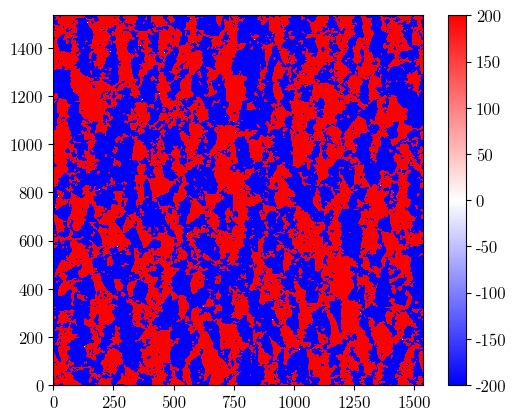

In [91]:
Bz_np = np.copy(first_[2,:,:] * np.sqrt(4 * np.pi))
plt.imshow(Bz_np, origin = "lower", cmap = "bwr", vmin = -200, vmax = 200)
plt.colorbar()

In [103]:
Vxm1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vym1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vxm1 = Vxm1[::3]
Vym1 = Vym1[::3]
Vxm1 = Vxm1.transpose(0, 2, 1)
Vym1 = Vym1.transpose(0, 2, 1)

In [104]:
Vxm1_mean = temporal_avg(Vxm1, 0, 90)
Vxm1_mean = Vxm1_mean/1E5
Vym1_mean = temporal_avg(Vym1, 0, 90)
Vym1_mean = Vym1_mean/1E5

In [105]:
Vxm1_filtered600 = gaussian_filter(Vxm1_mean, 11.25, mode = "wrap")
Vym1_filtered600 = gaussian_filter(Vym1_mean, 11.25, mode = "wrap")

In [106]:
Vx_Bz1 = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz_tracked.fits")[0].data
Vy_Bz1 = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz_tracked.fits")[1].data

In [107]:
Vx_Bz1_mean = temporal_avg(Vx_Bz1, 0, 90)
Vy_Bz1_mean = temporal_avg(Vy_Bz1, 0, 90)

In [108]:
Vx_Bz1_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz_tracked.fits")
Vy_Bz1_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz_tracked.fits")

In [109]:
Vx_Bz71 = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz777_tracked.fits")[0].data
Vy_Bz71 = fits.open("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz777_tracked.fits")[1].data

In [110]:
Vx_Bz1_cor7 = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz777_tracked.fits")
Vy_Bz1_cor7 = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_30_logTaum1Bz777_tracked.fits")

In [111]:
RRRRx1B = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_cor7.flatten())
print(RRRRx1B)
RRRRy1B = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_cor7.flatten())
print(RRRRy1B)

PearsonRResult(statistic=0.8629662329511432, pvalue=0.0)
PearsonRResult(statistic=0.8803236543116376, pvalue=0.0)


In [112]:
Rxm1_fil = pearsonr(Vxm1_filtered600.flatten(), Vx_Bz1_mean.flatten())
print(Rxm1_fil)
Rym1_fil = pearsonr(Vym1_filtered600.flatten(), Vy_Bz1_mean.flatten())
print(Rym1_fil)

PearsonRResult(statistic=0.15084625660791076, pvalue=0.0)
PearsonRResult(statistic=0.3457079683715483, pvalue=0.0)


In [113]:
R = pearsonr(Vx_Bz1_cor.flatten(), Vx_Bz1_cor7.flatten())
print(R)

PearsonRResult(statistic=0.8921679519709212, pvalue=0.0)
